In [75]:
import xml.etree.ElementTree as ET

def get_root(directory):
   root = ET.parse(directory).getroot()
   
   return root
feature_list = [
   'accent', 'breaks', 'phones', 
   'phonwords', 'syllables', 'turns',
   'phrase'
   ]
feat = 'phones'
tag_mapping = {
   'accent': ['accent', 'pointer'],
   'phones': ['ph', 'None'],
   'breaks': ['break', 'pointer'],
   'phonwords': ['phonword', 'child'],
   'syllables': ['syllable', 'child'],
   'turns': ['turn', 'child'],
   'phrase': ['phrase', 'child']
   }
rt = get_root(f'corpora/nxt_switchboard_ann/xml/{feat}/sw2018.A.{feat}.xml')
rt

<Element '{http://nite.sourceforge.net/}phoneme_stream' at 0x7fbb29f74e50>

In [81]:
tag_list = list()
for elem in rt:
    print(elem.tag.replace('{http://nite.sourceforge.net/}', ''))
    print(elem, elem.text)
    #print(elem.attrib)#.replace('{http://nite.sourceforge.net/}', ''))
    for child in elem:
        print(child.tag, child.attrib)
        print(child.text)
        print()
   
        


ph
<Element 'ph' at 0x7fbb29f83cc0> SIL
ph
<Element 'ph' at 0x7fbb29f831d0> hh
ph
<Element 'ph' at 0x7fbb29f83360> ax
ph
<Element 'ph' at 0x7fbb29f83400> l
ph
<Element 'ph' at 0x7fbb29f834a0> ow
ph
<Element 'ph' at 0x7fbb29f838b0> SIL
ph
<Element 'ph' at 0x7fbb29f83720> dh
ph
<Element 'ph' at 0x7fbb29f83e00> ih
ph
<Element 'ph' at 0x7fbb29f83c70> s
ph
<Element 'ph' at 0x7fbb29f754f0> ih
ph
<Element 'ph' at 0x7fbb29f75d10> z
ph
<Element 'ph' at 0x7fbb29f75ea0> l
ph
<Element 'ph' at 0x7fbb29f75130> ow
ph
<Element 'ph' at 0x7fbb29f75220> ih
ph
<Element 'ph' at 0x7fbb29f75540> s
ph
<Element 'ph' at 0x7fbb29f75770> SIL
ph
<Element 'ph' at 0x7fbb29f75860> SIL
ph
<Element 'ph' at 0x7fbb29f75b80> SIL
ph
<Element 'ph' at 0x7fbb29f75040> ae
ph
<Element 'ph' at 0x7fbb29f75680> n
ph
<Element 'ph' at 0x7fbb29f75cc0> d
ph
<Element 'ph' at 0x7fbb29f75a90> ah
ph
<Element 'ph' at 0x7fbb29f75360> m
ph
<Element 'ph' at 0x7fbb29f759a0> SIL
ph
<Element 'ph' at 0x7fbb29f751d0> ay
ph
<Element 'ph' at 0x7fbb2

In [86]:
from pathlib import Path
from tqdm import tqdm
attrib_dict = dict()
xml_dir = Path('corpora/nxt_switchboard_ann/xml/')
for directory in tqdm(list(xml_dir.glob('*'))):
    if not directory.name.endswith('.xml'):
        for file in directory.glob('*.xml'):
            root = get_root(file)
            iter_list = list()
            for elem in root.iter():
                iter_list.append(elem.tag.replace('{http://nite.sourceforge.net/}', ''))
            attrib_dict[directory.stem] = set(iter_list)
            break
attrib_dict   

  0%|          | 0/21 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 315.08it/s]


{'breaks': {'break', 'break_stream', 'pointer'},
 'corpus-resources': {'dialogue', 'dialogue_stream', 'pointer'},
 'terminals': {'pointer', 'punc', 'sil', 'terminal_stream', 'trace', 'word'},
 'phonwords': {'child', 'laughter', 'noise', 'phonword', 'phonword_stream'},
 'phrase': {'child', 'phrase', 'phrase_stream'},
 'prosnotes': {'prosnote', 'prosnote_stream'},
 'phones': {'ph', 'phoneme_stream'},
 'accent': {'accent', 'accent_stream', 'pointer'},
 'markable': {'markable', 'pointer', 'root'},
 'disfluency': {'child', 'disf_stream', 'disfluency', 'repair', 'reparandum'},
 'syllables': {'child', 'syllable', 'syllable_stream'},
 'movement': {'movement', 'movement_stream', 'pointer'},
 'kontrast': {'child', 'kontrast', 'root'},
 'coreference': {'link', 'pointer', 'root'},
 'active': {'active', 'pointer', 'root'},
 'dialAct': {'child', 'da', 'dialAct_stream'},
 'turns': {'child', 'turn', 'turn_stream'},
 'syntax': {'child', 'nt', 'parse', 'parse_stream'}}

set()

In [19]:
tag_list = list()
for elem in rt.iter():
    print(elem.tag.replace('{http://nite.sourceforge.net/}', ''))
    print(elem.attrib)#.replace('{http://nite.sourceforge.net/}', ''))
    
    for el in elem.attrib:
        print(el)

48

In [130]:
from pathlib import Path
from tqdm import tqdm
from pprint import pprint
import pandas as pd
import os
attrib_dict = dict()
xml_dir = Path('corpora/nxt_switchboard_ann/xml/')
save_dir = Path('corpora/nxt_switchboard_ann/csv')
for feat in tqdm(feature_list):
    directory = xml_dir / feat
    feat_list = list()
    for file in tqdm(list(directory.glob('*.xml'))):
        save_stem = ''.join(file.name.split('.')[:2])
        root = get_root(file)
        iter_list = list()
        for elem in root:
            if elem.tag == tag_mapping[feat][0]:
                feat_list.append(elem.attrib)
            for child in elem:
                tag = child.tag.replace('{http://nite.sourceforge.net/}', '')
                if tag == tag_mapping[feat][-1]:
                    #print(child)
                    feat_list[-1].update(child.attrib)               
        
        df = pd.DataFrame(feat_list)
        df.columns = [
            col.replace('{http://nite.sourceforge.net/}', '') for col in df.columns
            ]
        os.makedirs(save_dir / feat, exist_ok=True)
        save_path = save_dir / feat / save_stem
        df.to_csv(save_path.with_suffix('.csv'))


 29%|██▊       | 2/7 [03:07<07:49, 93.86s/it]


KeyboardInterrupt: 

In [132]:
accent_file_ids = [
        ''.join(file.split('.')[:2]) for file in os.listdir('corpora/nxt_switchboard_ann/xml/accent')
    ]
accent_file_ids

['sw4830B',
 'sw3227B',
 'sw4890A',
 'sw3682B',
 'sw2836A',
 'sw2370A',
 'sw2397A',
 'sw2145B',
 'sw4033B',
 'sw4150A',
 'sw4877A',
 'sw4019B',
 'sw2434B',
 'sw3171B',
 'sw2429A',
 'sw3876A',
 'sw3902B',
 'sw3161B',
 'sw2499B',
 'sw4090A',
 'sw4153A',
 'sw4325A',
 'sw2708A',
 'sw3156A',
 'sw2018A',
 'sw3925A',
 'sw3798B',
 'sw2290B',
 'sw4129B',
 'sw3838A',
 'sw3188A',
 'sw4346A',
 'sw2615A',
 'sw3349B',
 'sw3219B',
 'sw2628A',
 'sw4127A',
 'sw2593B',
 'sw2611A',
 'sw2593A',
 'sw4127B',
 'sw2611B',
 'sw3219A',
 'sw3349A',
 'sw2628B',
 'sw2615B',
 'sw3838B',
 'sw4129A',
 'sw2290A',
 'sw4346B',
 'sw3188B',
 'sw3925B',
 'sw2018B',
 'sw3798A',
 'sw3156B',
 'sw4325B',
 'sw2708B',
 'sw4153B',
 'sw3161A',
 'sw4090B',
 'sw2499A',
 'sw2429B',
 'sw3902A',
 'sw3876B',
 'sw4019A',
 'sw2434A',
 'sw4877B',
 'sw3171A',
 'sw4033A',
 'sw4150B',
 'sw2397B',
 'sw2145A',
 'sw2370B',
 'sw2836B',
 'sw3682A',
 'sw3227A',
 'sw4890B',
 'sw4830A',
 'sw4168B',
 'sw2305B',
 'sw4175A',
 'sw4329A',
 'sw3169B',
 'sw

In [144]:
csv_dir = Path('corpora/nxt_switchboard_ann/csv/accent')
length = 0
data = list()
ntype = 0
nstrength = list()
for file in csv_dir.glob('*.csv'):
    
    df = pd.read_csv(file)
    #pprint(df)
    data.extend(df.id.to_list())
    try:
        ntype += len(df['type'].dropna())
    except KeyError:
       nstrength.extend(df['strength'].dropna().to_list())
       continue 
    nstrength.extend(df['strength'].dropna().to_list())
 
print(f"total accents: {length}")
print(f"total strengths: {nstrength}")
print(f"total types: {ntype}")   
df = pd.DataFrame({'id': data, 'strength': nstrength})
df

total accents: 0
total strengths: ['full', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'weak', 'full', 'full', 'full', 'full', 'weak', 'full', 'full', 'weak', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'full', 'weak', 'full', 'full

,id,strength
0,sw3161.B.acc1.aw6,full
1,sw3161.B.acc2.aw9,full
2,sw3161.B.acc3.aw11,full
3,sw3161.B.acc4.aw17,full
4,sw3161.B.acc5.aw22,weak
...,...,...
34567,sw2499.B.acc298.aw1387,full
34568,sw2499.B.acc299.aw1388,full
34569,sw2499.B.acc300.aw1390,full
34570,sw2499.B.acc301.aw1397,full


In [145]:
!pip install seaborn
!pip install soundfile

  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 1.3 MB/s eta 0:00:0000:0100:01
  Using cached soundfile-0.12.1-py2.py3-none-macosx_10_9_x86_64.whl (1.2 MB)


In [150]:
import os
os.listdir('~/desktop/files/Stanford/Class files/Autumn 2023/TA Workshop')

FileNotFoundError: [Errno 2] No such file or directory: '~/desktop/files/Stanford/Class files/Autumn 2023/TA Workshop'

In [177]:
import soundfile as sf
waves = Path('corpora/nxt_switchboard_ann/wav')

for file in waves.glob('*.wav'):
    audio, sr = sf.read(file)
    try:
        assert sr == 16_000
    except AssertionError:
        print(sr)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 MB 12.2 MB/s eta 0:00:0000:0100:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 32.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 35.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.5 MB/s eta 0:00:0000:01
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 34.7 MB/s eta 0:00:0000:0100:01
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━

2023-12-05 11:06:23.382711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


138/138 [==============================] - 74s 532ms/step


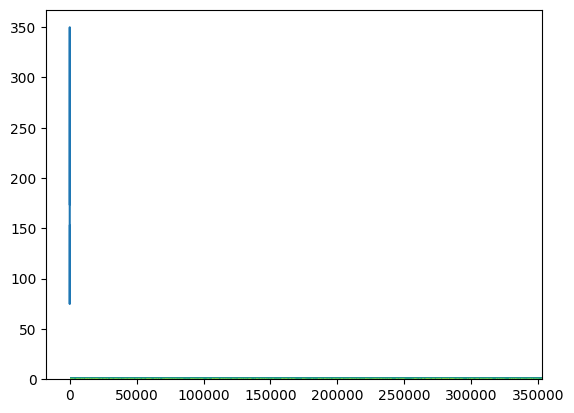

In [3]:

import crepe
from scipy.io import wavfile
import matplotlib.pyplot as plt
sr, audio = wavfile.read('data/switchboard/wav/sw2285B_t100.wav')
time, frequency, confidence, activation = crepe.predict(audio, sr, viterbi=True)

f = plt.specgram(audio)
plt.plot(time, frequency)

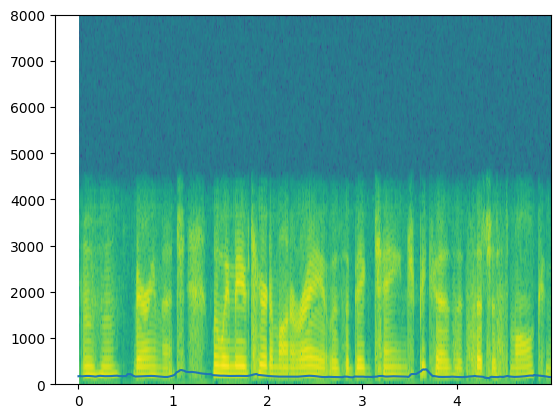

In [45]:
plt.specgram(audio[:80000], Fs=16000)
plt.plot(time[:500], frequency[:500])
plt.savefig('test.png', dpi=3000)

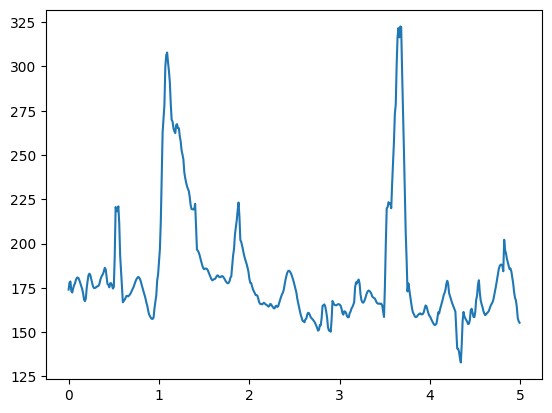

In [22]:
plt.plot(time[:500], frequency[:500])

In [20]:
len(time), max(time)

(4413, 44.12)

In [21]:
4413/44

100.29545454545455

In [43]:
5*16000

80000

In [41]:
audio.shape

(705972,)

In [60]:
import numpy as np
if time.shape[0] % 2 == 0:
    mean_time = np.mean(frequency.reshape(-1, 2), axis=1)
else:
    mean_time = np.concatenate([np.mean(frequency[:-1].reshape(-1, 2), axis=1).flatten(), frequency[-1]])
    
mean_time.shape[0],\
time[0::2].shape[0]

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

In [70]:
np.append(np.mean(frequency[:-1].reshape(-1, 2), axis=1), frequency[-1]).shape

(2207,)

In [65]:
frequency[:8]

array([174.0179879 , 178.07099416, 178.5651068 , 173.13617981,
       172.36630475, 174.67161263, 176.46671911, 177.46515582])

In [67]:
(178+173)/2

175.5

In [74]:
16000 * 0.025
16000 * 0.02

320.0

In [118]:
#!pip install pinyin
import pinyin
import pandas as pd
import re

def get_tone_indices(x):
    m = re.findall('\d+', x)
    if m != []:
        return ''.join(m)
    else:
        return x
df = pd.read_csv('corpora/global_timit_cmn/data/segmentation/SP01_001.words', sep=' ', names=['char', 'start', 'end'])
def split_pinyin(row):
    
    tone_indices = row.tone
    pinyin_text = row.pinyin_txt 
    if (len(tone_indices) > 1) and (tone_indices != 'sil'):
        
        return pinyin_text[:pinyin_text.index(tone_indices[0])+1] + '_' + pinyin_text[pinyin_text.index(tone_indices[0])+1:]
    else:
        return pinyin_text
        
    
df['pinyin_txt'] = df.char.map(lambda x: pinyin.get(x, format='numerical'))
df['tone'] = df.pinyin_txt.map(lambda x: get_tone_indices(x))
df['split_tone'] = df.apply(lambda x: split_pinyin(x), axis=1)
df['phones'] = df.pinyin_txt.map(lambda x: re.findall('[^\d]+', x))
df


,char,start,end,pinyin_txt,tone,split_tone,phones
0,sil,0.0000,0.2325,sil,sil,sil,[sil]
1,他们,0.2325,0.4925,ta1men5,15,ta1_men5,"[ta, men]"
2,抓紧,0.4925,0.8325,zhua1jin3,13,zhua1_jin3,"[zhua, jin]"
3,一切,0.8325,1.2025,yi1qie1,11,yi1_qie1,"[yi, qie]"
4,运力,1.2025,1.5925,yun4li4,44,yun4_li4,"[yun, li]"
5,sil,1.5925,1.6725,sil,sil,sil,[sil]
6,将,1.6725,1.8925,jiang1,1,jiang1,[jiang]
7,旅客,1.8925,2.3325,lv3ke4,34,lv3_ke4,"[lv, ke]"
8,分批,2.3325,2.7725,fen1pi1,11,fen1_pi1,"[fen, pi]"
9,分拨,2.7725,3.1225,fen1bo1,11,fen1_bo1,"[fen, bo]"


In [125]:
vowel_inventory = [
    'i', 'iii', 'ang', 'iu', 'e',
    'ing', 'en', 'iang', 'ii', 'ong',
    'v', 'ou', 'uo', 'uan', 'ui', 'eng', 'u', 'an',
    'ian', 'a', 'van', 'ai', 'uang', 've', 
    'un', 'ao', 'er','ei', 'ua', 'ia', 'in', 'ie', 'vn', 'iao',
    'iong', 'uai'
]
df2 = pd.read_csv('corpora/global_timit_cmn/data/segmentation/SP01_001.phones', sep=' ', names=['char', 'start', 'end'])
tone_list = list()
df_preprocess = pd.DataFrame()
def yield_next_tone(x):
    
    for tone in x:
        yield tone
        
        
for row in df.itertuples():
    tone_iterator = yield_next_tone(row.tone)
    df_subset = df2.loc[
        (df2.start >= row.start) &\
            (df2.end <= row.end)
                ]
    df_subset['tone'] = df_subset.char.map(lambda x: next(tone_iterator) if x in vowel_inventory else 0)
    df_preprocess = pd.concat([df_preprocess, df_subset])
    
df_preprocess

/var/folders/34/pf1c30ln17bcy8tw3szdv_h00000gn/T/ipykernel_55588/4220357289.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['tone'] = df_subset.char.map(lambda x: next(tone_iterator) if x in vowel_inventory else 0)
/var/folders/34/pf1c30ln17bcy8tw3szdv_h00000gn/T/ipykernel_55588/4220357289.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['tone'] = df_subset.char.map(lambda x: next(tone_iterator) if x in vowel_inventory else 0)
/var/folders/34/pf1c30ln17bcy8tw3szdv_h00000gn/T/ipy

,char,start,end,tone
0,sil,0.0000,0.2325,0
1,t,0.2325,0.3025,0
2,a,0.3025,0.3625,1
3,m,0.3625,0.4225,0
4,en,0.4225,0.4925,5
5,zh,0.4925,0.5525,0
6,ua,0.5525,0.6825,1
7,j,0.6825,0.7425,0
8,in,0.7425,0.8325,3
9,i,0.8325,0.9925,1


In [113]:
from pathlib import Path

files = Path('corpora/global_timit_cmn/data/segmentation/')
df = pd.DataFrame()
for transcript in files.glob('*.phones'):
    iter_df = pd.read_csv(transcript, sep=' ', names=['phone', 'start', 'end'])
    iter_df['file'] = [transcript.stem]*len(iter_df)
    df = pd.concat([df, iter_df])
    
    


In [114]:
from collections import Counter
inventory = Counter(df.phone.to_list())
inventory

Counter({'sil': 13728,
         'l': 4774,
         'i': 7449,
         'sh': 6821,
         'iii': 4614,
         'ch': 2731,
         'ang': 2802,
         'iu': 2281,
         'zh': 5868,
         'e': 8730,
         'j': 6370,
         'ing': 3148,
         'r': 2097,
         'en': 4040,
         'd': 8849,
         'x': 4585,
         'iang': 1809,
         's': 1306,
         'ii': 1314,
         'g': 4307,
         'ong': 3200,
         'q': 2861,
         'v': 1944,
         'h': 3818,
         'ou': 2015,
         'uo': 4088,
         'uan': 1080,
         'ui': 2715,
         'eng': 2665,
         'b': 3827,
         'u': 5324,
         'k': 1978,
         'an': 2986,
         'c': 1421,
         'ian': 3769,
         'a': 3182,
         'f': 2383,
         'n': 1871,
         'van': 766,
         'ai': 3807,
         'uang': 943,
         'z': 2980,
         'p': 969,
         've': 925,
         't': 3527,
         'un': 737,
         'ao': 2497,
         'er': 291,
      

In [115]:
df.loc[df.phone == 'er']

,phone,start,end,file
27,er,2.8525,3.0225,SP35_013
27,er,3.4825,3.7225,SP02_013
22,er,2.6425,2.8325,SP28_102
3,er,0.4625,0.7725,SP11_031
14,er,1.8125,1.9625,SP06_047
...,...,...,...,...
12,er,1.3125,1.4925,SP03_007
11,er,1.1425,1.3425,SP34_007
18,er,2.2125,2.3325,SP29_104
15,er,1.6625,1.8325,SP10_046


In [119]:
vowel_inventory = [
    'i', 'iii', 'ang', 'iu', 'e',
    'ing', 'en', 'iang', 'ii', 'ong',
    'v', 'ou', 'uo', 'uan', 'ui', 'eng', 'u', 'an',
    'ian', 'a', 'van', 'ai', 'uang', 've', 
    'un', 'ao', 'er','ei', 'ua', 'ia', 'in', 'ie', 'vn', 'iao',
    'iong', 'uai'
]

In [126]:
file_id_list = [file.stem for file in Path('corpora/global_timit_cmn/data/wav').glob('*.wav')]

In [128]:
for file in Path('corpora/global_timit_cmn/data/wav').glob('*.wav'):
    
    if file.stem == '.wav':
        print(file)
        break

corpora/global_timit_cmn/data/wav/.wav


In [170]:
df = pd.DataFrame()
def ms2idx(time_ms, step_ms=0.02):
    time_s = time_ms * 1000
    step_s = step_ms * 1000
    return ((time_s - (time_s%step_s))/ step_s) / 1000
#for data in Path('data/switchboard/phones').glob('*.csv'):
#    dur = librosa.get_duration(path=f'data/switchboard/wav/{data.stem}.wav')
#    iter_df = pd.concat([df, pd.read_csv(data)])
#    iter_df['file_id'] = data.stem
def floor_to_frame_idx(n, step=0.02):
    
    return (n - (n%step))/step
    
    
ms2idx(1.00)

0.01999999999999998
0.98
1000.0
50.0


0.05

In [171]:
pd.read_csv('data/switchboard/phones/sw2145B_t88.csv')

,Unnamed: 0,start,end,label


In [173]:
from IPython.display import Audio

Audio('data/switchboard/phones/sw2145B_t88.csv')

In [10]:
import os
from pathlib import Path
import pandas as pd
#empty_dict = dict()
corpora = Path('data/switchboard')
file_list = os.listdir(corpora)
empty_list = list()
for feat in file_list:
    feat_files = corpora / feat
    for file in feat_files.glob('*.csv'):
        
        if len(pd.read_csv(file)) == 0:
            empty_list.append(file.stem)
    #empty_dict[feat] = empty_list
#empty_dict_len = {k: len(v) for k, v in empty_dict.items()}
#empty_dict_len
excluded_files = set(empty_list)

In [3]:
len(excluded_files)

0

In [17]:
import soundfile as sf
from IPython.display import Audio
target_file = 'sw2305A_t42'
feature = 'turns'
csv_file = corpora / feature / target_file
df = pd.read_csv(csv_file.with_suffix('.csv'))

audio_path = corpora / 'wav' / target_file
data, sr = sf.read(audio_path.with_suffix('.wav'))
print(df)
Audio(data, rate=sr)


FileNotFoundError: [Errno 2] No such file or directory: 'data/switchboard/turns/sw2305A_t42.csv'

In [9]:
check = pd.read_csv(f'corpora/nxt_switchboard_ann/csv/phones/sw3798B.csv')
turn_check = pd.read_csv(f'corpora/nxt_switchboard_ann/csv/turns/sw3798B.csv') 
turn_start_end = turn_check.loc[turn_check.id == 't164'][['start', 'end']]
print(turn_start_end)
check.loc[(check.start >= turn_start_end.start.item()) & (check.end <= turn_start_end.end.item())]

         start         end
68  283.170625  293.372375


,start,end,id,msstate,label


In [13]:
df = pd.read_csv('data/switchboard/accent/sw4019B_t40.csv')
print(df)

   Unnamed: 0                    id     start       end strength  label role  \
0          46  sw4019.B.acc47.aw177  0.616975  0.616975     full      1   at   
1          47  sw4019.B.acc48.aw180  1.159831  1.159831     full      1   at   
2          48  sw4019.B.acc49.aw182  1.602687  1.602687     full      1   at   

                                     href  
0  sw4019.B.phonwords.xml#id(ms33B_pw120)  
1  sw4019.B.phonwords.xml#id(ms33B_pw123)  
2  sw4019.B.phonwords.xml#id(ms33B_pw125)  


   Unnamed: 0                    id     start       end strength  label role  \
0          36  sw4019.B.acc37.aw152  0.268788  0.268788     full      1   at   
1          37  sw4019.B.acc38.aw153  0.743458  0.743458     full      1   at   
2          38  sw4019.B.acc39.aw153  0.924092  0.924092     weak      1   at   
3          39  sw4019.B.acc40.aw155  1.214359  1.214359     full      1   at   
4          40  sw4019.B.acc41.aw159  2.314356  2.314356     full      1   at   
5          41  sw4019.B.acc42.aw164  3.129487  3.129487     full      1   at   
6          42  sw4019.B.acc43.aw165  3.481867  3.481867     full      1   at   
7          43  sw4019.B.acc44.aw167  3.967580  3.967580     full      1   at   
8          44  sw4019.B.acc45.aw170  4.539007  4.539007     full      1   at   
9          45  sw4019.B.acc46.aw172  5.139006  5.139006     full      1   at   

                                     href  
0   sw4019.B.phonwords.xml#id(ms33B_pw97)  
1   sw4019.B.phonwords.xml#id(m

(array([[1.16321314e-07, 5.05168966e-07, 6.09061903e-06, ...,
         1.29066161e-05, 1.94245422e-08, 8.69450914e-08],
        [8.84031402e-08, 1.21218002e-07, 9.32460520e-06, ...,
         9.75516771e-06, 2.84912632e-06, 5.02219269e-07],
        [1.76352135e-06, 4.74893992e-06, 4.23164512e-06, ...,
         1.61922800e-05, 2.32116106e-06, 2.99041639e-07],
        ...,
        [3.99447432e-11, 1.42432539e-10, 1.05318087e-11, ...,
         4.37315443e-11, 2.75898680e-12, 7.18328984e-11],
        [2.16002335e-11, 2.81125632e-11, 4.48941638e-12, ...,
         2.14565672e-11, 5.17520083e-12, 7.78608515e-11],
        [1.67151012e-14, 4.74191673e-13, 4.14825168e-12, ...,
         5.20419046e-12, 1.27741850e-12, 3.98499166e-11]]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.1484375, 0.15625  , 0.

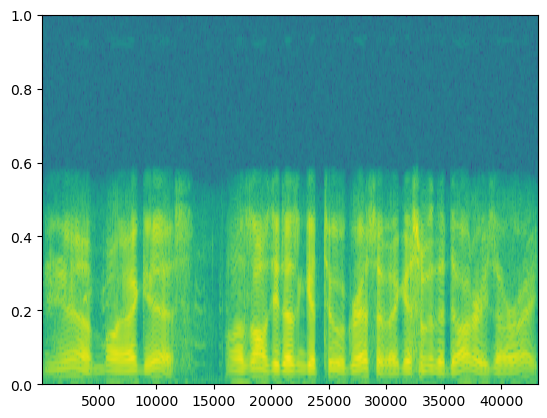

In [23]:
from IPython.display import Audio
import soundfile as sf
import pandas as pd
import matplotlib.pyplot as plt
audio, sr = sf.read('data/switchboard/wav/sw4019B_t38.wav')
df = pd.read_csv('data/switchboard/accent/sw4019B_t38.csv')
df2 = pd.read_csv('data/switchboard/phonwords/sw4019B_t38.csv')
print(df, df2)
print(len(df), len(df2))

Audio(audio, rate=sr)
plt.specgram(audio)

In [11]:
pd.read_csv('corpora/nxt_switchboard_ann/csv/turns/sw2395A.csv')

,id,start,end,approx,label,href,firstKnownStart,lastKnownEnd
0,t1,1.271750,2.451750,False,\n,sw2395.A.syntax.xml#id(s1),NaN,NaN
1,t4,9.501125,10.501375,False,\n,sw2395.A.syntax.xml#id(s4),NaN,NaN
2,t6,11.370625,12.382125,False,\n,sw2395.A.syntax.xml#id(s6),NaN,NaN
3,t7-2,13.573125,13.813125,False,\n,sw2395.A.syntax.xml#id(s8),NaN,NaN
4,t8-2,13.813125,14.853125,False,\n,sw2395.A.syntax.xml#id(s9),NaN,NaN
...,...,...,...,...,...,...,...,...
60,t118-1,556.406375,556.836375,False,\n,sw2395.A.syntax.xml#id(s189),NaN,NaN
61,t121-2,579.309250,590.819375,False,\n,sw2395.A.syntax.xml#id(s195)..id(s198),NaN,NaN
62,t122,590.819375,592.649375,False,\n,sw2395.A.syntax.xml#id(s199),NaN,NaN
63,t123,592.649375,594.024125,True,\n,sw2395.A.syntax.xml#id(s200),NaN,NaN


In [12]:
len(os.listdir('data/switchboard/phones')) - len(excluded_files)

NameError: name 'os' is not defined

In [ ]:
#!pip install librosa
import random
import pandas as pd
import librosa
from pathlib import Path

def ms2idx(time_s, step_s=0.02):
    time_ms = int(time_s * 1000)
    step_ms = int(step_s * 1000)
    return ((time_ms - (time_ms%step_ms))/ step_ms) / 1000

sample_file = random.choice(list(Path('data/switchboard/wav/').glob('*.wav')))

sample_file_id = sample_file.stem

sample_file_phones = pd.read_csv(f'data/switchboard/phones/{sample_file_id}.csv')
sample_file_accents = pd.read_csv(f'data/switchboard/accent/{sample_file_id}.csv') 

sample_dur = librosa.get_duration(path=sample_file)

neural_shape = (sample_dur / 0.02, 1024)

print(f'file duration is {sample_dur}, neural shape should be {neural_shape}')

sample_file_phones

file duration is 6.70675, neural shape should be (335.33750000000003, 1024)


,Unnamed: 0,start,end,label
0,648,0.00000,0.28000,ay
1,649,0.28000,0.40000,th
2,650,0.40000,0.43000,ih
3,651,0.43000,0.47000,ng
4,652,0.47000,0.52000,k
5,653,0.52000,0.63000,ay
6,654,0.63000,0.73000,v
7,655,0.73000,0.78000,b
8,656,0.78000,0.83000,ih
9,657,0.83000,0.90000,n


In [ ]:
import os
missing_files = list()
for wave in Path('data/switchboard/wav/').glob('*.wav'):
    
    for feat in ['accent', 'breaks', 'phones', 'phonwords', 'phrase', 'syllables']:
        check_path = f'data/switchboard/{feat}/{wave.stem}.csv'
        if not os.path.isfile(check_path):
            
            missing_files.append(check_path)
            

if len(check_path) > 0:
    print(check_path)
else:
    print('All files exist')

data/switchboard/turns/sw2305A_t42.csv


In [ ]:
def ms2idx(time_s, step_s=0.02):
    time_ms = int(time_s * 1000)
    step_ms = int(step_s * 1000)
    return ((time_ms - (time_ms%step_ms))/ step_ms)



ms2idx(1)

50.0

In [33]:
import pandas as pd
from ast import literal_eval
df = pd.read_csv('data/switchboard/aligned_tasks/phonwords_accents.csv')
df['start_end_indices'] = df.start_end_indices.map(literal_eval)
df_subset = df.iloc[12:14]
df_exploded = df_subset.explode('start_end_indices', ignore_index=True)
df_exploded[:8]


,start,end,label,file_id,start_end_indices
0,2.009,2.10,0,sw4033B_t44,100
1,2.009,2.10,0,sw4033B_t44,101
2,2.009,2.10,0,sw4033B_t44,102
3,2.009,2.10,0,sw4033B_t44,103
4,2.100,2.48,1,sw4033B_t44,104
5,2.100,2.48,1,sw4033B_t44,105
6,2.100,2.48,1,sw4033B_t44,106
7,2.100,2.48,1,sw4033B_t44,107
